__IMPORRTING THE DEPENDENCIES__

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
data=pd.read_csv(r"D:\RESUME ML PROJECTS\Students' Academic Performance Dataset\Student_Data\xAPI-Edu-Data.csv")

__DATA PREPROCESSING__

In [101]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [102]:
data.shape

(480, 17)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [104]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [105]:
data.duplicated().sum()

2

In [106]:
data[data.duplicated()]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
326,M,Jordan,Jordan,lowerlevel,G-02,A,French,F,Father,10,15,10,21,No,Bad,Above-7,L
327,M,Jordan,Jordan,lowerlevel,G-02,A,French,S,Father,30,10,20,5,No,Bad,Above-7,L


In [107]:
# remove duplicated
data.drop_duplicates(inplace=True)

In [108]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,478.000000,478.000000,478.000000,478.000000
mean,46.887029,54.974895,38.014644,43.410042
std,30.787903,33.035071,26.623507,27.620961
min,0.000000,0.000000,0.000000,1.000000
25%,16.000000,20.000000,14.250000,20.000000
50%,50.000000,65.000000,33.000000,39.500000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [109]:
categorical_cols=data.select_dtypes(include="object").columns
for col in categorical_cols:
    print(f"The categorical cols are {col}")

The categorical cols are gender
The categorical cols are NationalITy
The categorical cols are PlaceofBirth
The categorical cols are StageID
The categorical cols are GradeID
The categorical cols are SectionID
The categorical cols are Topic
The categorical cols are Semester
The categorical cols are Relation
The categorical cols are ParentAnsweringSurvey
The categorical cols are ParentschoolSatisfaction
The categorical cols are StudentAbsenceDays
The categorical cols are Class


In [110]:
numerical_cols=data.select_dtypes(exclude="object").columns
for col in numerical_cols:
    print(f"The numerical_cols  are {col}")

The numerical_cols  are raisedhands
The numerical_cols  are VisITedResources
The numerical_cols  are AnnouncementsView
The numerical_cols  are Discussion


In [111]:
data['raisedhands'].dtype

dtype('int64')

In [112]:
data.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [113]:
for col in data.columns:
    print(f"the unique elements in {col}  col is {data[col].unique()}")
    print('-------------------------------------------')

the unique elements in gender  col is ['M' 'F']
-------------------------------------------
the unique elements in NationalITy  col is ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
-------------------------------------------
the unique elements in PlaceofBirth  col is ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
-------------------------------------------
the unique elements in StageID  col is ['lowerlevel' 'MiddleSchool' 'HighSchool']
-------------------------------------------
the unique elements in GradeID  col is ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
-------------------------------------------
the unique elements in SectionID  col is ['A' 'B' 'C']
-------------------------------------------
the unique elements in Topic  col is ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 

In [114]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [115]:
# drop some cols
data.drop(columns=["PlaceofBirth","NationalITy","SectionID"],inplace=True,axis=1)

In [116]:
data.head()

,gender,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,G-04,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,lowerlevel,G-04,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,lowerlevel,G-04,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,lowerlevel,G-04,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,lowerlevel,G-04,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


__VISUALISATION__

Text(0.5, 1.0, 'count of the gender col')

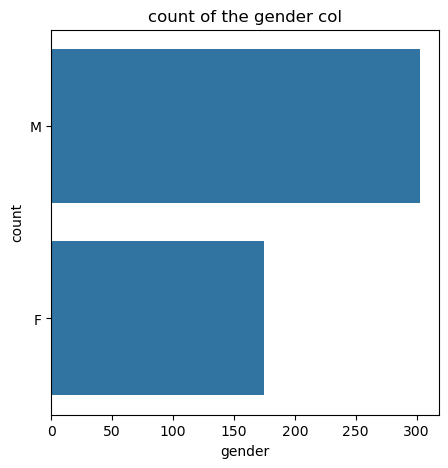

In [117]:
plt.figure(figsize=(5,5))
sns.countplot(data['gender'])
plt.xlabel("gender")
plt.ylabel("count")
plt.title("count of the gender col")

Text(0.5, 1.0, 'count of the StageID col')

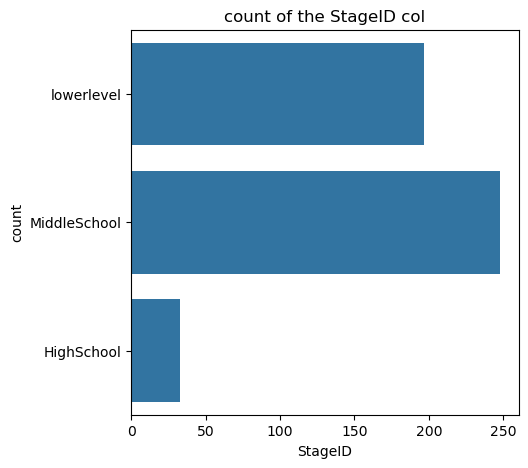

In [118]:
plt.figure(figsize=(5,5))
sns.countplot(data["StageID"])
plt.xlabel("StageID")
plt.ylabel("count")
plt.title("count of the StageID col")

Text(0.5, 1.0, 'count of the GradeID col')

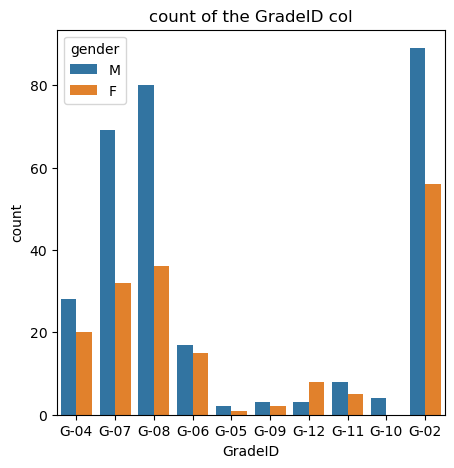

In [119]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x="GradeID",hue="gender")
plt.xlabel("GradeID")
plt.ylabel("count")
plt.title("count of the GradeID col")

Male have high grade compare to female.....

Text(0.5, 1.0, 'compare the count of gradeid and stage id')

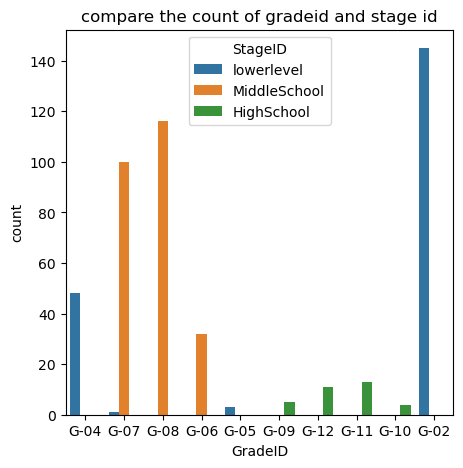

In [120]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x="GradeID",hue="StageID")
plt.xlabel("GradeID")
plt.ylabel("count")
plt.title("compare the count of gradeid and stage id")

In [121]:
data.head()

,gender,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,G-04,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,lowerlevel,G-04,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,lowerlevel,G-04,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,lowerlevel,G-04,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,lowerlevel,G-04,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


Text(0.5, 1.0, 'count of the StageID col')

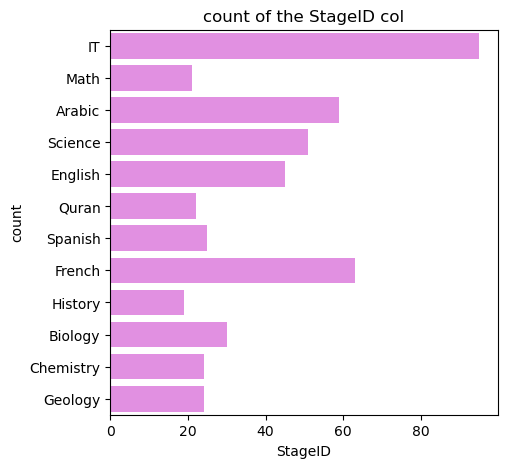

In [122]:
plt.figure(figsize=(5,5))
sns.countplot(data["Topic"],color="violet")
plt.xlabel("StageID")
plt.ylabel("count")
plt.title("count of the StageID col")

Text(0.5, 1.0, 'count of the StageID col')

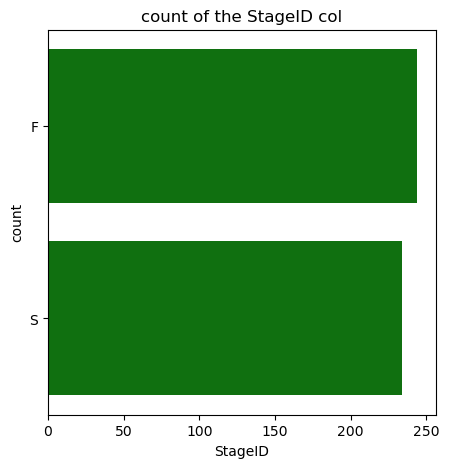

In [123]:
plt.figure(figsize=(5,5))
sns.countplot(data["Semester"],color="green")
plt.xlabel("StageID")
plt.ylabel("count")
plt.title("count of the StageID col")

C:\Users\HP\AppData\Local\Temp\ipykernel_11748\4050656253.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["raisedhands"])


<Axes: xlabel='raisedhands', ylabel='Density'>

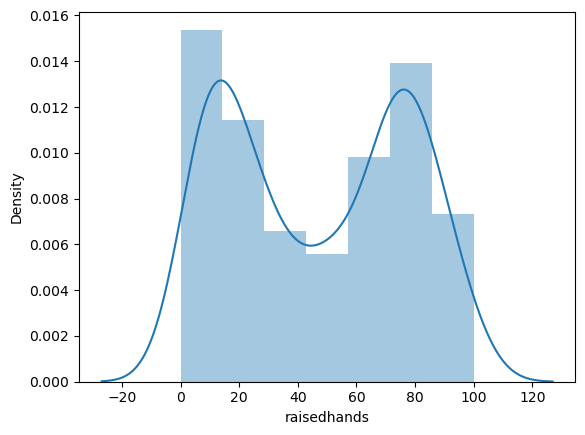

In [124]:
sns.distplot(data["raisedhands"])

Text(0.5, 1.0, 'count of the StageID col')

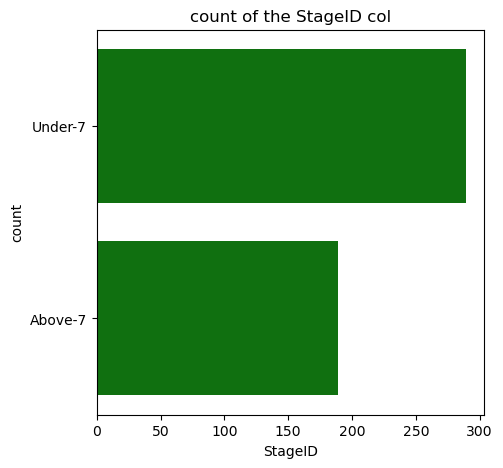

In [125]:
plt.figure(figsize=(5,5))
sns.countplot(data["StudentAbsenceDays"],color="green")
plt.xlabel("StageID")
plt.ylabel("count")
plt.title("count of the StageID col")

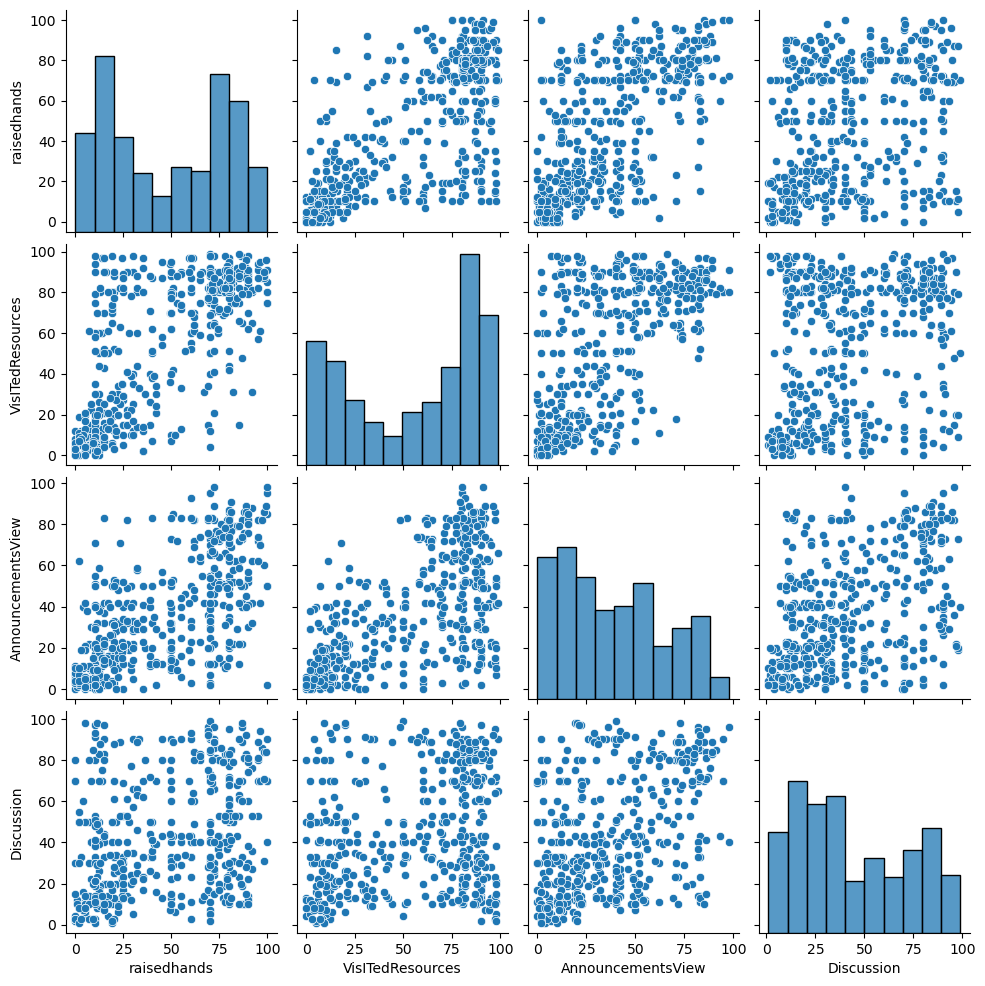

In [126]:
sns.pairplot(data)

<Axes: >

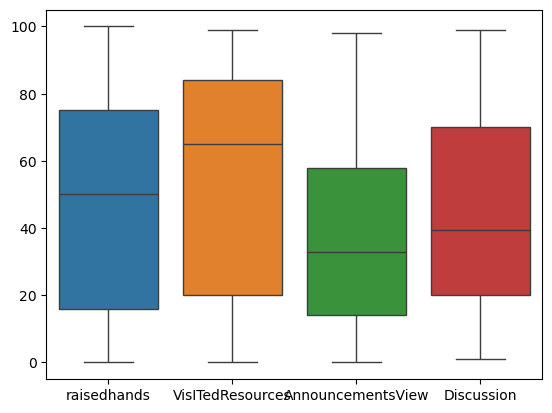

In [127]:
sns.boxplot(data)

Text(0.5, 1.0, 'count of the StageID col')

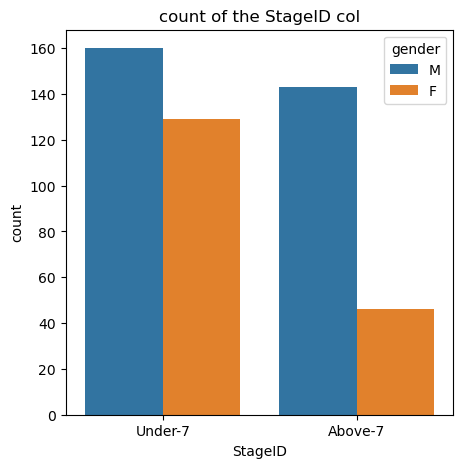

In [128]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x="StudentAbsenceDays",hue="gender")
plt.xlabel("StageID")
plt.ylabel("count")
plt.title("count of the StageID col")

__FEATURE_ENGINEERING__

In [129]:
data.head()

,gender,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,G-04,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,lowerlevel,G-04,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,lowerlevel,G-04,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,lowerlevel,G-04,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,lowerlevel,G-04,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [130]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
label_encoder=LabelEncoder()

In [131]:
for col in data.columns:
    # print(f"applying label_encoder for cat cols")
    data[col]=label_encoder.fit_transform(data[col])

In [132]:
data.head()

,gender,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,2,1,7,0,0,15,16,2,18,1,1,1,2
1,1,2,1,7,0,0,20,20,3,23,1,1,1,2
2,1,2,1,7,0,0,10,7,0,28,0,0,0,1
3,1,2,1,7,0,0,29,24,5,33,0,0,0,1
4,1,2,1,7,0,0,35,43,12,46,0,0,0,2


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    478 non-null    int32
 1   StageID                   478 non-null    int32
 2   GradeID                   478 non-null    int32
 3   Topic                     478 non-null    int32
 4   Semester                  478 non-null    int32
 5   Relation                  478 non-null    int32
 6   raisedhands               478 non-null    int64
 7   VisITedResources          478 non-null    int64
 8   AnnouncementsView         478 non-null    int64
 9   Discussion                478 non-null    int64
 10  ParentAnsweringSurvey     478 non-null    int32
 11  ParentschoolSatisfaction  478 non-null    int32
 12  StudentAbsenceDays        478 non-null    int32
 13  Class                     478 non-null    int32
dtypes: int32(10), int64(4)
memory usage: 37.3 KB


In [134]:
data.isnull().sum()

gender                      0
StageID                     0
GradeID                     0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [135]:
data[data.duplicated()]

,gender,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
417,1,1,4,1,1,0,73,81,83,74,1,1,1,0


In [137]:
# remove duplicated
data.drop_duplicates(inplace=True)

In [138]:
data.shape

(477, 14)

<Axes: >

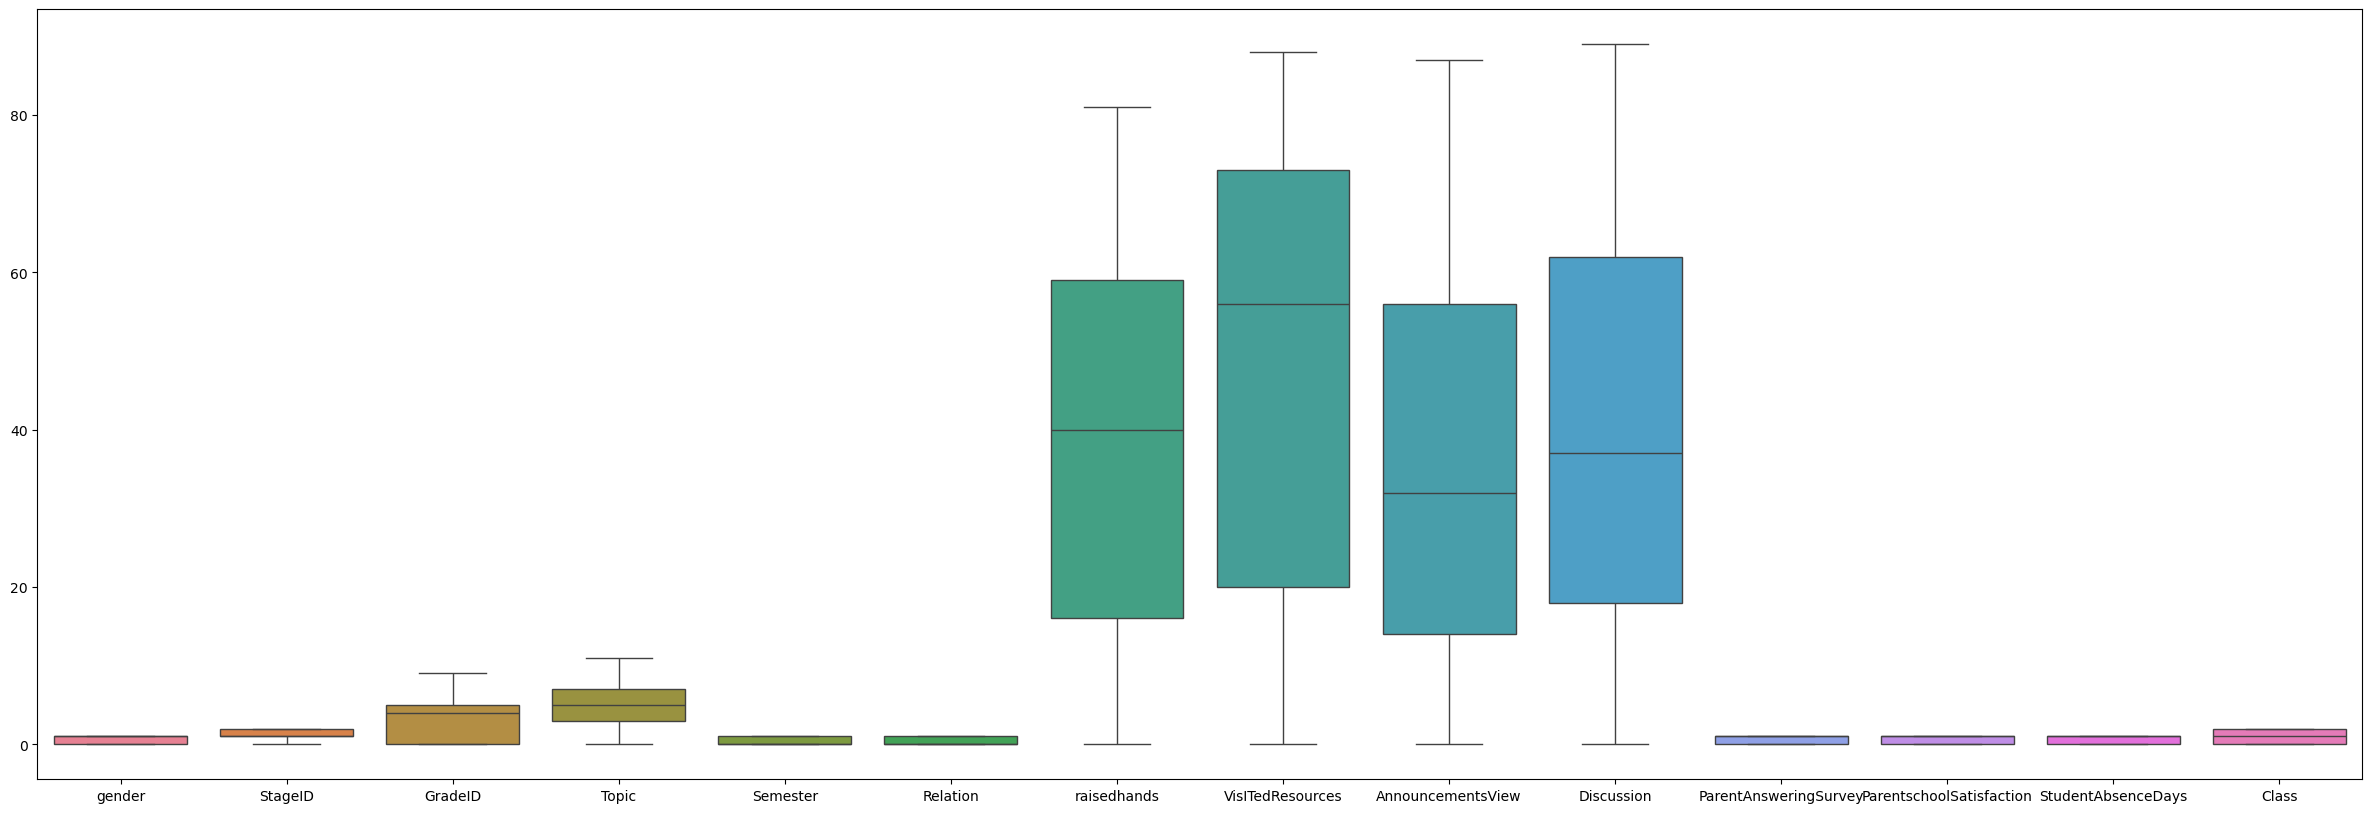

In [142]:
plt.figure(figsize=(30,10))
sns.boxplot(data)

<Axes: >

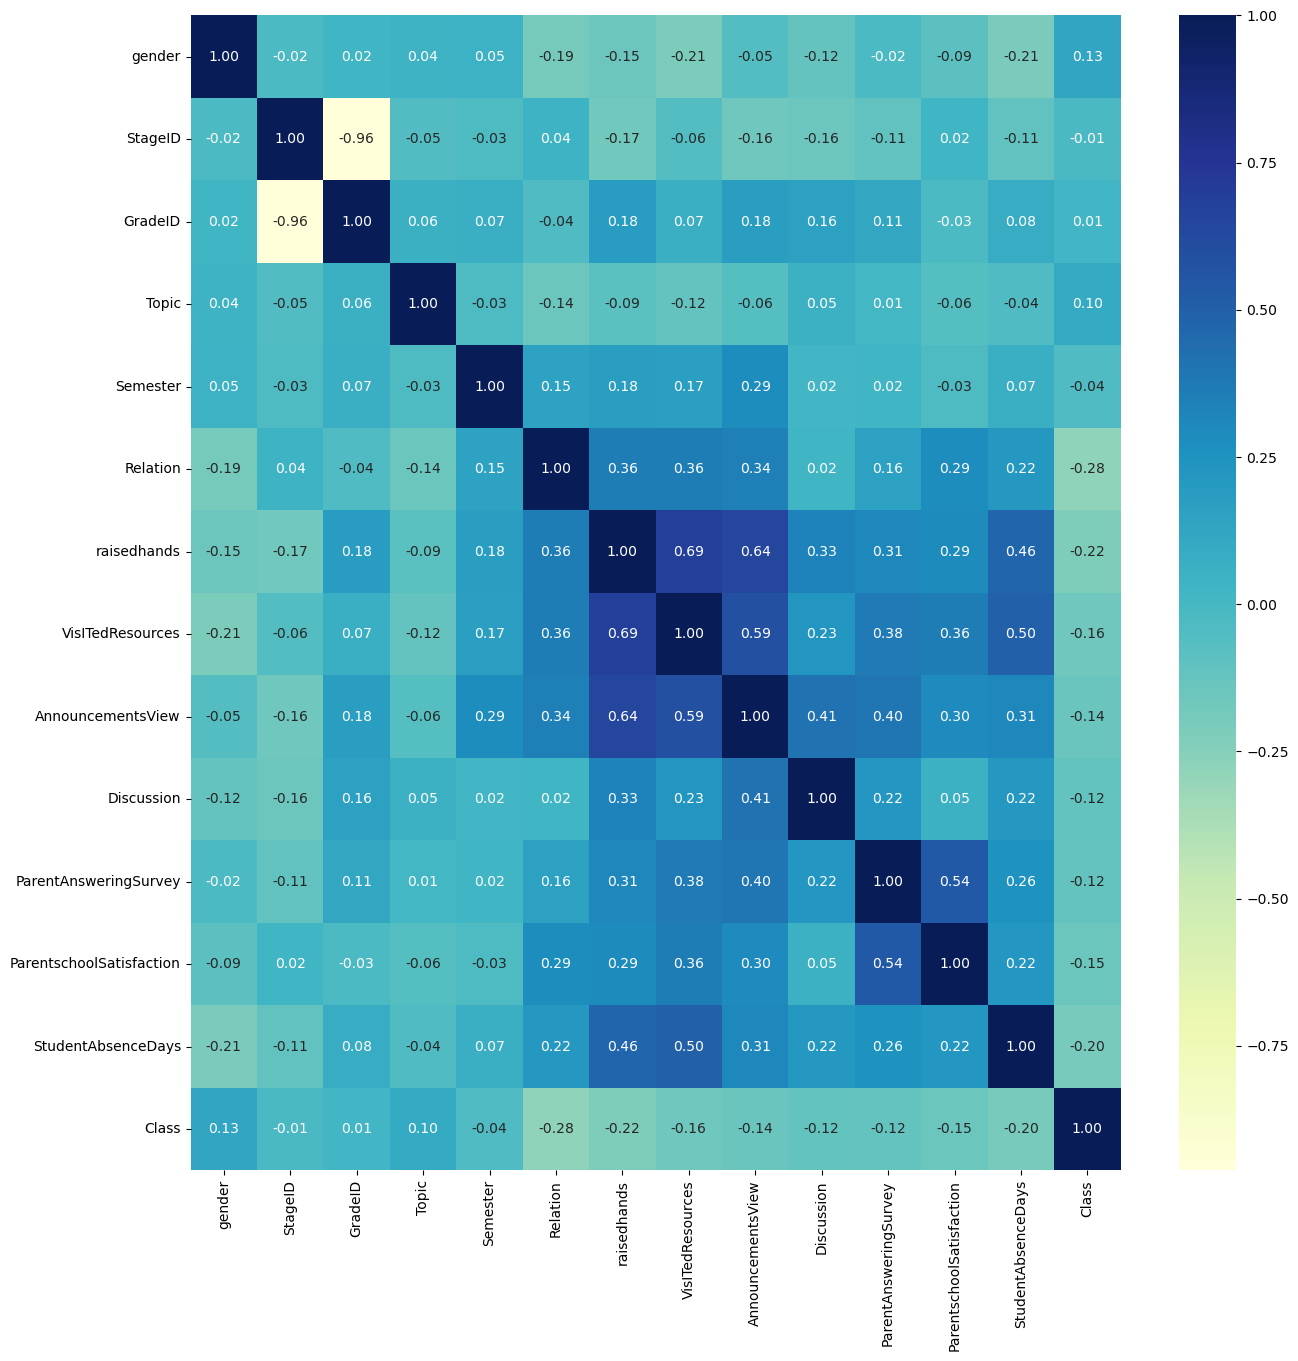

In [146]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu',fmt='.2f')

In [152]:
X=data.drop(columns="Class")
Y=data['Class']

In [153]:
print(X)

     gender  StageID  GradeID  Topic  Semester  Relation  raisedhands  \
0         1        2        1      7         0         0           15   
1         1        2        1      7         0         0           20   
2         1        2        1      7         0         0           10   
3         1        2        1      7         0         0           29   
4         1        2        1      7         0         0           35   
..      ...      ...      ...    ...       ...       ...          ...   
475       0        1        5      2         1         0            5   
476       0        1        5      5         0         0           40   
477       0        1        5      5         1         0           44   
478       0        1        5      6         0         0           29   
479       0        1        5      6         1         0           32   

     VisITedResources  AnnouncementsView  Discussion  ParentAnsweringSurvey  \
0                  16                  2    

In [154]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [155]:
x_train.shape

(381, 13)

In [157]:

scaler_data = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler_data.fit_transform(x_train)

# Transform the test data using the fitted scaler
x_test_scaled = scaler_data.transform(x_test)

In [158]:
x_test_scaled

array([[ 0.75787873, -0.56026225,  0.8394201 , ...,  0.8976008 ,
         0.78821101, -1.22073588],
       [ 0.75787873, -0.56026225,  0.8394201 , ...,  0.8976008 ,
         0.78821101,  0.81917802],
       [ 0.75787873, -0.56026225,  0.42992067, ...,  0.8976008 ,
         0.78821101,  0.81917802],
       ...,
       [-1.31947232, -0.56026225,  0.8394201 , ...,  0.8976008 ,
        -1.2686958 ,  0.81917802],
       [-1.31947232, -2.22791784,  2.47741784, ...,  0.8976008 ,
         0.78821101,  0.81917802],
       [ 0.75787873, -0.56026225,  0.42992067, ...,  0.8976008 ,
         0.78821101, -1.22073588]])

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [160]:


models={
    "LogisticRegression":LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),


}



     


In [164]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

def evaluate(y_true, y_pred):
    # For multiclass classification, use 'macro' or 'weighted' for metrics
    f1score = f1_score(y_true, y_pred, average='macro')  # or 'micro' or 'weighted'
    accuracy = accuracy_score(y_true, y_pred)  # No need to specify 'average' here
    precision = precision_score(y_true, y_pred, average='macro')  # or 'micro' or 'weighted'
    recall = recall_score(y_true, y_pred, average='macro')  # or 'micro' or 'weighted'

    return f1score, accuracy, precision, recall



In [166]:
# Lists to store model names and r2 scores
model_list = []
r2_scores = []

for i in range(len(list(models.values()))):
    model_name=list(models.keys())[i]
    model=list(models.values())[i]
    model.fit(x_train_scaled,y_train)

    y_pred=model.predict(x_train_scaled)
    # print(y_pred)


    y_pred_tets=model.predict(x_test_scaled)
    # print(y_pred_tets)





    f1_train,precision_train,accuray_train,recall_train=evaluate(y_train,y_pred)
    

    f1_test,precision_test,accuray_test,recall_tets=evaluate(y_test,y_pred_tets)

    

    print(f"model name {model_name}")
    model_list.append(model_name)

     # Print training performance
    print("Performance for Train Data")
    print(f"f1_train: {f1_train:.4f}")
    print(f"precision_train: {precision_train:.4f}")
    print(f"accuray_train: {accuray_train:.4f}")
    
    print("--------------------------------------------------")
    
    # Print test performance
    print("Performance for Test Data")
    print(f"f1_test: {f1_test:.4f}")
    print(f"precision_test: {precision_test:.4f}")
    print(f"accuray_test: {accuray_test:.4f}")
    r2_scores.append(accuray_test)
    
    print("=" * 35)
    print('\n')

model name LogisticRegression
Performance for Train Data
f1_train: 0.8268
precision_train: 0.8215
accuray_train: 0.8296
--------------------------------------------------
Performance for Test Data
f1_test: 0.7386
precision_test: 0.7292
accuray_test: 0.7326


model name RandomForestClassifier
Performance for Train Data
f1_train: 1.0000
precision_train: 1.0000
accuray_train: 1.0000
--------------------------------------------------
Performance for Test Data
f1_test: 0.7446
precision_test: 0.7396
accuray_test: 0.7494


model name GradientBoostingClassifier
Performance for Train Data
f1_train: 0.9950
precision_train: 0.9948
accuray_train: 0.9961
--------------------------------------------------
Performance for Test Data
f1_test: 0.7364
precision_test: 0.7292
accuray_test: 0.7291


model name AdaBoostClassifier
Performance for Train Data
f1_train: 0.6607
precision_train: 0.6404
accuray_train: 0.6667
--------------------------------------------------
Performance for Test Data
f1_test: 0.657

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
